In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv("/home/krmsh1n5/Desktop/Python/Projects/NBA_MVP_Predictions/NBA_Dataset.csv")
data.fillna(0)

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.2,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,10.0,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,2.1,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.1,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329


In [4]:
mvp_list = data.loc[data.groupby("season")["award_share"].idxmax()]
mvp_list["mvp"] = True
data = data.merge(mvp_list[["season", "award_share", "mvp"]], on=["season", "award_share"], how="left")
data['mvp'] = data['mvp'].astype('boolean').fillna(False)

In [5]:
data = data.loc[data["gs"] > 20]
data = data.loc[data["mp_per_g"] > 10]
data = data.loc[data["pts_per_g"] > 5]

data[data["mvp"] == True]

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,mvp
186,1982,Moses Malone,C,26,HOU,81,81,42.0,11.7,22.5,...,0.218,6.2,-1.8,4.5,5.5,0.735,-0.04,-0.39,0.561,True
493,1983,Moses Malone,C,27,PHI,78,78,37.5,8.4,16.7,...,0.248,4.0,-0.3,3.7,4.2,0.960,7.67,7.53,0.793,True
647,1984,Larry Bird,PF,27,BOS,79,77,38.3,9.6,19.5,...,0.215,5.6,2.0,7.6,7.3,0.858,6.56,6.42,0.756,True
957,1985,Larry Bird,SF,28,BOS,80,77,39.5,11.5,22.0,...,0.238,6.8,2.0,8.8,8.7,0.978,6.65,6.47,0.768,True
1278,1986,Larry Bird,SF,29,BOS,82,81,38.0,9.7,19.6,...,0.244,6.6,2.1,8.7,8.4,0.981,9.41,9.06,0.817,True
1719,1987,Magic Johnson,PG,27,LAL,80,80,36.3,8.5,16.4,...,0.263,7.5,1.3,8.8,8.0,0.940,9.30,8.32,0.793,True
2067,1988,Michael Jordan,SG,24,CHI,82,82,40.4,13.0,24.4,...,0.308,8.8,4.2,13.0,12.5,0.831,3.40,3.76,0.610,True
2407,1989,Magic Johnson,PG,29,LAL,77,77,37.5,7.5,14.8,...,0.267,7.3,2.0,9.4,8.3,0.782,7.17,6.38,0.695,True
2767,1990,Magic Johnson,PG,30,LAL,79,79,37.2,6.9,14.4,...,0.270,8.3,1.8,10.1,8.9,0.691,6.78,6.74,0.768,True
3162,1991,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,...,0.321,8.9,3.2,12.0,10.8,0.928,9.10,8.57,0.744,True


In [21]:
mvp_factors = data.copy()
mvp_factors = pd.concat([mvp_factors, pd.get_dummies(mvp_factors['mvp'], prefix='Is_MVP')], axis=1)
mvp_factors.drop(columns=['mvp', 'season', 'Is_MVP_False', 'pos', 'team_id'], inplace=True)

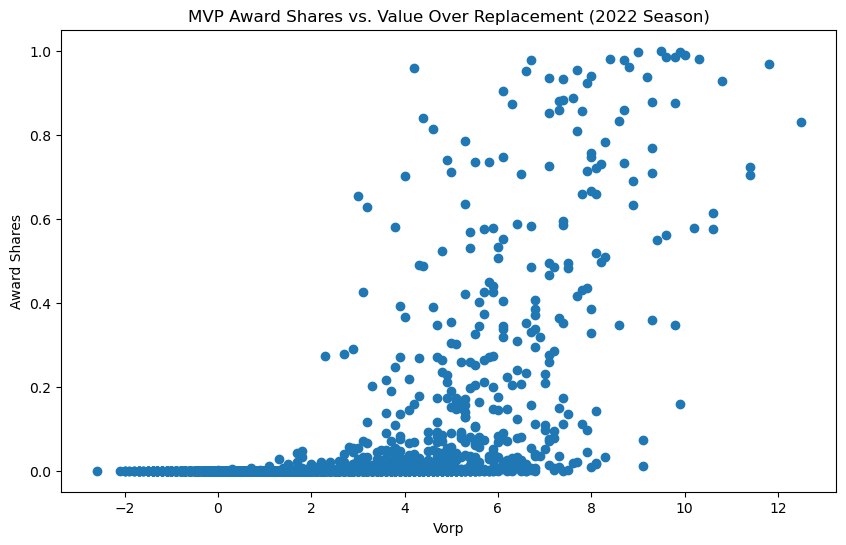

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(data['vorp'], data['award_share'])
plt.title('MVP Award Shares vs. Value Over Replacement (2022 Season)')
plt.xlabel('Vorp')
plt.ylabel('Award Shares')
plt.show()

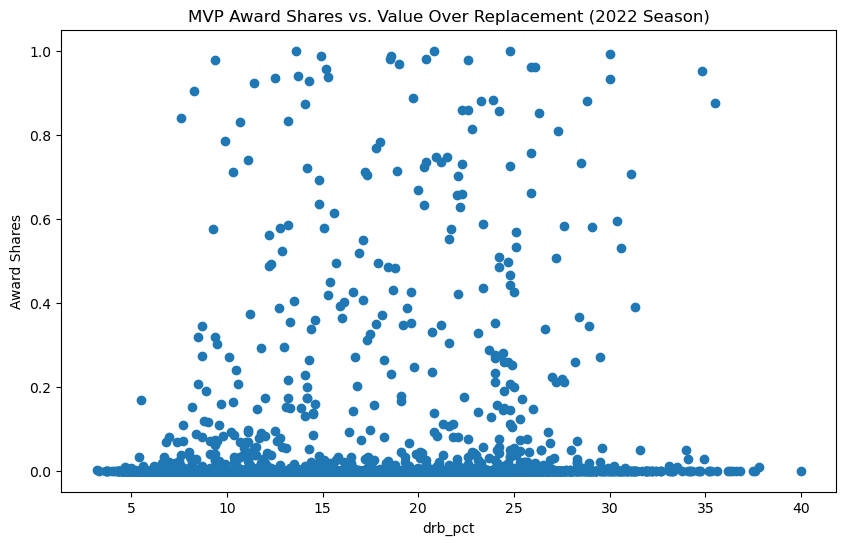

In [18]:
plt.figure(figsize = (10,6))
plt.scatter(data['drb_pct'], data['award_share'])
plt.title('MVP Award Shares vs. Defensive Rebound Percentage (2022 Season)')
plt.xlabel('drb_pct')
plt.ylabel('Award Shares')
plt.show()

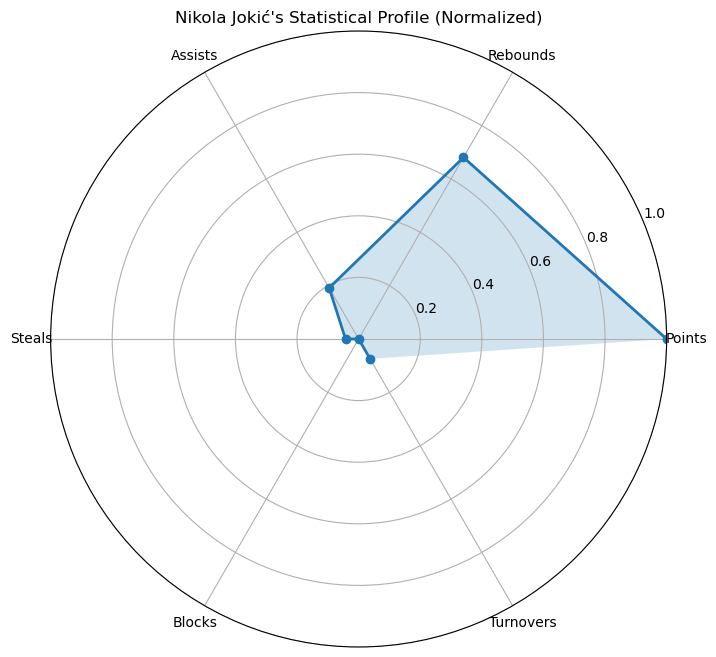

In [33]:
player_name = 'Nikola Jokić'
mvp_data = mvp_factors[mvp_factors['player'] == player_name].iloc[0]
stats = ['pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g']
values = [mvp_data[stat] for stat in stats]

values_normalized = (values - np.min(values)) / (np.max(values) - np.min(values))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
theta = np.linspace(0, 2 * np.pi, len(stats), endpoint=False)

ax.plot(theta, values_normalized, 'o-', linewidth=2)
ax.fill(theta, values_normalized, alpha=0.2)

stat_labels = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers']
ax.set_thetagrids(theta * 180 / np.pi, stat_labels)
ax.set_title(f"{player_name}'s Statistical Profile (Normalized)")
ax.set_ylim(0, 1)
plt.show()

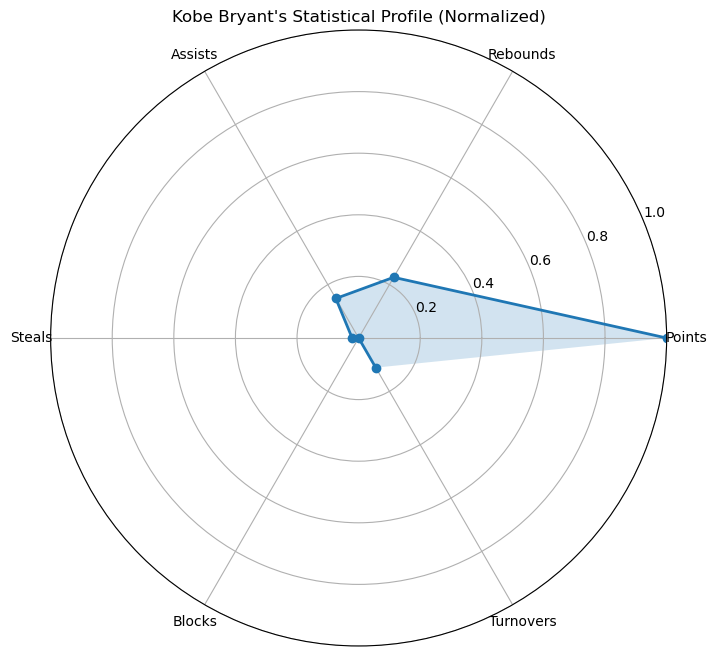

In [34]:
player_name = 'Kobe Bryant'
mvp_data = mvp_factors[mvp_factors['player'] == player_name].iloc[0]
stats = ['pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g']
values = [mvp_data[stat] for stat in stats]

values_normalized = (values - np.min(values)) / (np.max(values) - np.min(values))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
theta = np.linspace(0, 2 * np.pi, len(stats), endpoint=False)

ax.plot(theta, values_normalized, 'o-', linewidth=2)
ax.fill(theta, values_normalized, alpha=0.2)

stat_labels = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers']
ax.set_thetagrids(theta * 180 / np.pi, stat_labels)
ax.set_title(f"{player_name}'s Statistical Profile (Normalized)")
ax.set_ylim(0, 1)
plt.show()

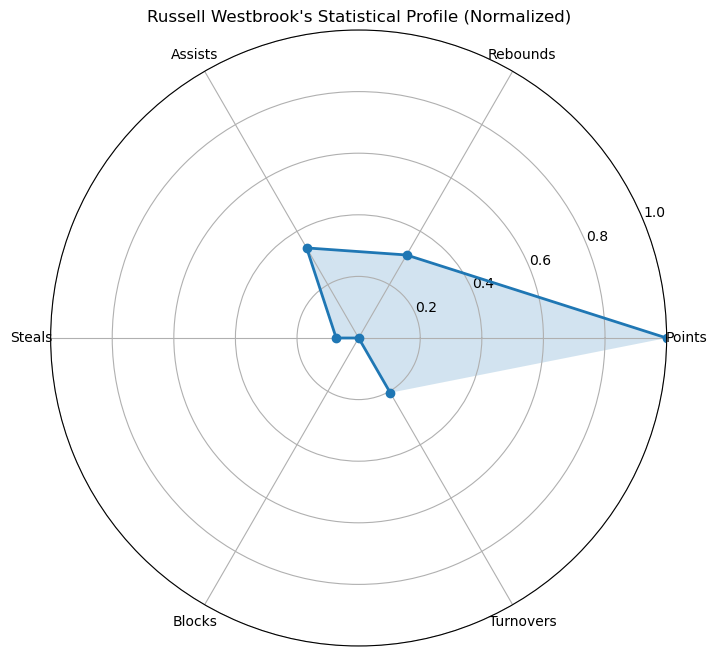

In [35]:
player_name = 'Russell Westbrook'
mvp_data = mvp_factors[mvp_factors['player'] == player_name].iloc[0]
stats = ['pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g']
values = [mvp_data[stat] for stat in stats]

values_normalized = (values - np.min(values)) / (np.max(values) - np.min(values))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
theta = np.linspace(0, 2 * np.pi, len(stats), endpoint=False)

ax.plot(theta, values_normalized, 'o-', linewidth=2)
ax.fill(theta, values_normalized, alpha=0.2)

stat_labels = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers']
ax.set_thetagrids(theta * 180 / np.pi, stat_labels)
ax.set_title(f"{player_name}'s Statistical Profile (Normalized)")
ax.set_ylim(0, 1)
plt.show()

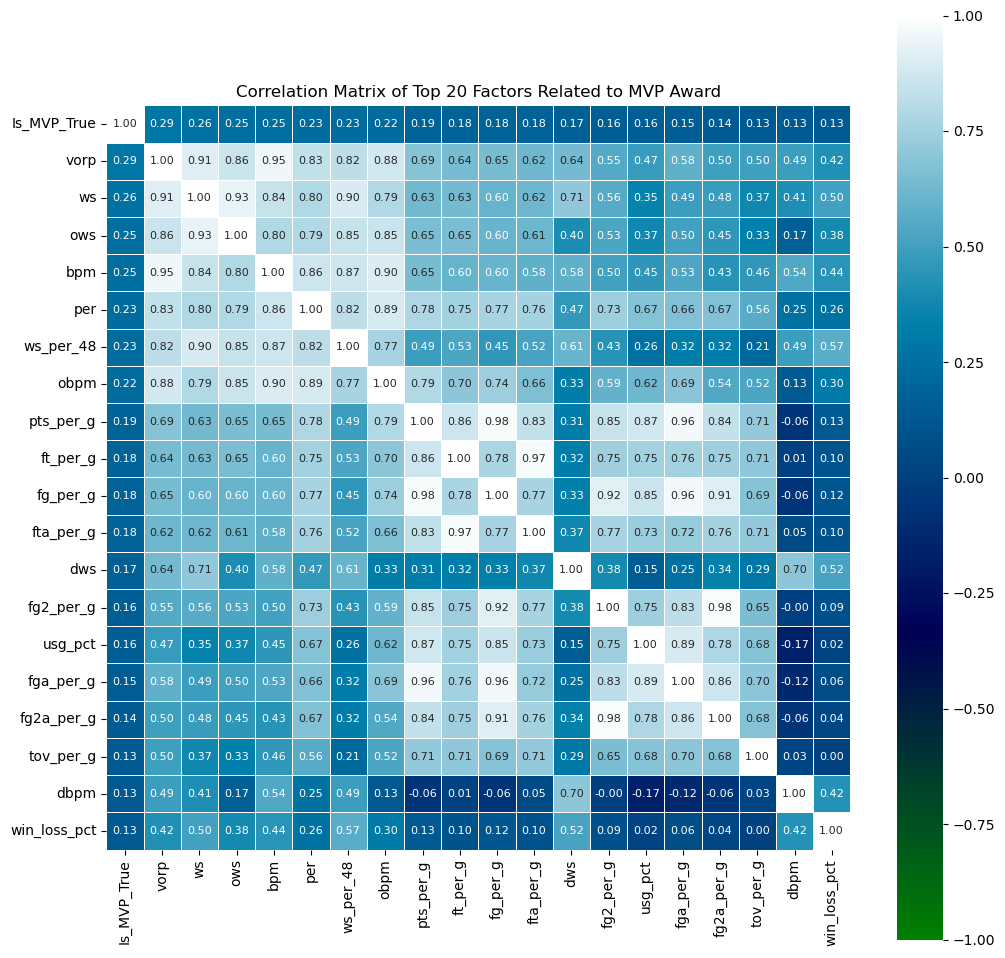

In [36]:
mvp_factors = mvp_factors.drop(columns=['award_share', 'player'])
corr_matrix = mvp_factors.corr()

# Get the top 20 factors correlated with the MVP variable
top_factors = corr_matrix['Is_MVP_True'].abs().sort_values(ascending=False).head(20).index

sorted_corr_matrix = corr_matrix.loc[top_factors, top_factors]

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    sorted_corr_matrix,
    vmin=-1, vmax=1,
    cmap="ocean",
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"fontsize": 8},
    linewidths=0.5,
    linecolor="white",
    cbar=True,
    cbar_kws={"orientation": "vertical"},
    square=True,
    xticklabels=True,
    yticklabels=True,
    ax=ax
)
plt.title("Correlation Matrix of Top 20 Factors Related to MVP Award")
plt.show()

In [37]:
predictors = sorted_corr_matrix.index[:21]
predictors = predictors[predictors != 'Is_MVP_True']
predictors

Index(['vorp', 'ws', 'ows', 'bpm', 'per', 'ws_per_48', 'obpm', 'pts_per_g',
       'ft_per_g', 'fg_per_g', 'fta_per_g', 'dws', 'fg2_per_g', 'usg_pct',
       'fga_per_g', 'fg2a_per_g', 'tov_per_g', 'dbpm', 'win_loss_pct'],
      dtype='object')

In [38]:
mvpfactors = mvp_factors.assign(Player=data['player'], Award_Shares=data['award_share'], Season=data['season'])

#The data will be trained on the data from NBA seasons 1982-2021 and will predict the 2022 MVP voting
train = mvpfactors[mvpfactors["Season"] < 2022]
test = mvpfactors[mvpfactors["Season"] == 2022]

reg = Ridge(alpha=0.1)
reg.fit(train[predictors], train["Award_Shares"])
predictions = reg.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player","Award_Shares"]], predictions], axis=1)

#Adding a column for the actual results of 2022 MVP voting
combination = combination.sort_values("Award_Shares", ascending=False)
combination["Rk"] = list(range(1, combination.shape[0] + 1))

#Adding a column for the predicted results of the MVP voting
combination = combination.sort_values("predictions", ascending=False)
combination["Predicted_Rk"] = list(range(1, combination.shape[0] + 1))

combination = combination.sort_values("Award_Shares", ascending=False)
combination.head(40)

,Player,Award_Shares,predictions,Rk,Predicted_Rk
17381,Nikola Jokić,0.875,0.294419,1,1
17253,Joel Embiid,0.706,0.185628,2,3
17103,Giannis Antetokounmpo,0.595,0.231374,3,2
17150,Devin Booker,0.216,0.079830,4,13
17232,Luka Dončić,0.146,0.162297,5,4
17617,Jayson Tatum,0.043,0.130731,6,5
17481,Ja Morant,0.010,0.072871,7,17
17217,Stephen Curry,0.004,0.079949,8,12
17529,Chris Paul,0.002,0.057570,9,22
17225,DeMar DeRozan,0.001,0.087631,10,10


In [39]:
mean_squared_error(combination["Award_Shares"], combination["predictions"])

0.004953966787614964

In [40]:
def find_ap(combination):
    
    # Sort the actual and predicted rankings
    actual = combination.sort_values("Award_Shares", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)

    # Calculate the average precision
    ps = []
    found = 0
    seen = 1
    for _, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1

    if not ps:
        return 0.0
    else:
        return sum(ps) / len(ps)
    
find_ap(combination)

0.876923076923077

In [41]:
years = list(range(1991,2022))
aps = []
all_predictions = []
for year in years[5:]:
    train = mvpfactors[mvpfactors["Season"] < year]
    test = mvpfactors[mvpfactors["Season"] == year]
    reg.fit(train[predictors],train["Award_Shares"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Award_Shares"]], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

sum(aps) / len(aps)

0.7592307699264713

In [42]:
def add_ranks(predictions):
    predictions = predictions.sort_values("predictions", ascending=False)
    predictions["Predicted_Rk"] = list(range(1,predictions.shape[0]+1))
    predictions = predictions.sort_values("Award_Shares", ascending=False)
    predictions["Rk"] = list(range(1,predictions.shape[0]+1))
    predictions["Diff"] = (predictions["Rk"] - predictions["Predicted_Rk"])
    return predictions
add_ranks(all_predictions[1])

,Player,Award_Shares,predictions,Predicted_Rk,Rk,Diff
5617,Karl Malone,0.857,0.277458,2,1,-1
5581,Michael Jordan,0.832,0.282211,1,2,1
5557,Grant Hill,0.327,0.274372,3,3,0
5545,Tim Hardaway,0.207,0.169452,5,4,-1
5707,Glen Rice,0.117,0.036364,40,5,-35
...,...,...,...,...,...,...
5677,Bo Outlaw,0.000,0.008023,69,168,99
5495,Joe Dumars,0.000,0.006951,70,169,99
5521,Dean Garrett,0.000,0.006400,71,170,99
5729,Bryon Russell,0.000,0.004860,72,171,99


In [43]:
def backtest(mvpfactors, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = mvpfactors[mvpfactors["Season"] < year]
        test = mvpfactors[mvpfactors["Season"] == year]
        model.fit(train[predictors],train["Award_Shares"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Award_Shares"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [44]:
mean_ap, aps, all_predictions = backtest(mvpfactors, reg, years[5:], predictors)
mean_ap

0.7592307699264713

In [45]:
all_predictions[all_predictions["Rk"] < 5].sort_values("Diff").head(10)

,Player,Award_Shares,predictions,Predicted_Rk,Rk,Diff
9201,Steve Nash,0.839,0.043942,37,1,-36
9658,Steve Nash,0.739,0.058117,32,1,-31
8832,Peja Stojaković,0.228,0.070638,21,4,-17
10116,Steve Nash,0.785,0.074812,18,2,-16
16697,Joel Embiid,0.580,0.054572,15,2,-13
7807,Jason Kidd,0.712,0.104661,14,2,-12
12563,Carmelo Anthony,0.393,0.079759,13,3,-10
6114,Shaquille O'Neal,0.268,0.087655,13,4,-9
8753,Jermaine O'Neal,0.425,0.099924,11,3,-8
12137,Kobe Bryant,0.291,0.041589,11,4,-7


In [46]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
5,0.661652,ws_per_48
0,0.087867,vorp
18,0.026245,win_loss_pct
12,0.025239,fg2_per_g
10,0.010784,fta_per_g
13,0.005925,usg_pct
7,0.004366,pts_per_g
2,-0.001482,ows
4,-0.001595,per
16,-0.001765,tov_per_g


In [47]:
rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)

rftrain = mvpfactors[mvpfactors['Season'] < 2022]
rftest = mvpfactors[mvpfactors['Season'] == 2022]

rf.fit(rftrain[predictors], rftrain["Award_Shares"])
rfpredictions = rf.predict(rftest[predictors])
rfpredictions = pd.DataFrame(rfpredictions, columns=["rfpredictions"], index=rftest.index)
rfcombination = pd.concat([rftest[["Player", "Award_Shares"]], rfpredictions], axis=1)

rfcombination = rfcombination.sort_values("Award_Shares", ascending=False)
rfcombination["Actual_Rank"] = list(range(1, rfcombination.shape[0] + 1))
rfcombination = rfcombination.sort_values("rfpredictions", ascending=False)
rfcombination["Predicted_Rank"] = list(range(1, rfcombination.shape[0] + 1))
rfcombination = rfcombination.sort_values("Award_Shares", ascending=False)
rfcombination.head(40)

,Player,Award_Shares,rfpredictions,Actual_Rank,Predicted_Rank
17381,Nikola Jokić,0.875,0.595726,1,1
17253,Joel Embiid,0.706,0.386611,2,3
17103,Giannis Antetokounmpo,0.595,0.482895,3,2
17150,Devin Booker,0.216,0.089077,4,8
17232,Luka Dončić,0.146,0.286696,5,4
17617,Jayson Tatum,0.043,0.074162,6,9
17481,Ja Morant,0.010,0.204768,7,5
17217,Stephen Curry,0.004,0.016378,8,16
17529,Chris Paul,0.002,0.009263,9,20
17225,DeMar DeRozan,0.001,0.013787,10,18


In [48]:
mean_squared_error(rfcombination["Award_Shares"], rfcombination["rfpredictions"])

0.0015574997776201462

In [49]:
mean_ap, aps, all_predictions = backtest(mvpfactors, rf, years[28:], predictors)
mean_ap

0.8652380952380954